# Obesity Levels Prediction
___

# Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report, roc_auc_score, zero_one_loss
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
ds_Obesity = pd.read_csv('/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv')
ds_Obesity

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Data Description from the author in kaggle

### Dataset description:
This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.l, "Obesity level"

### Features and Target description:
Gender: Feature, Categorical, "Gender"

Age : Feature, Continuous, "Age"

Height: Feature, Continuous

Weight: Feature Continuous

family_history_with_overweight: Feature, Binary, " Has a family member suffered or suffers from overweight? "

FAVC : Feature, Binary, " Do you eat high caloric food frequently? "

FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "

NCP : Feature, Continuous, " How many main meals do you have daily? "

CAEC : Feature, Categorical, " Do you eat any food between meals? "

SMOKE : Feature, Binary, " Do you smoke? "

CH2O: Feature, Continuous, " How much water do you drink daily? "

SCC: Feature, Binary, " Do you monitor the calories you eat daily? "

FAF: Feature, Continuous, " How often do you have physical activity? "

TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

CALC : Feature, Categorical, " How often do you drink alcohol? "

MTRANS : Feature, Categorical, " Which transportation do you usually use? "

NObeyesdad : Target, Categorical, "Obesity level"

# Data Exploration

In [3]:
ds_Obesity.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
ds_Obesity.tail()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,23.664709,Female,1.738836,133.472641,Sometimes,yes,3.0,3.0,no,no,2.863513,yes,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
ds_Obesity.sample(5)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
1686,23.812795,Male,1.767121,116.164351,Sometimes,yes,1.655684,3.0,no,no,2.000000,yes,0.976425,0.690082,Sometimes,Public_Transportation,Obesity_Type_II
1306,40.993179,Female,1.567756,79.493626,no,yes,2.000000,3.0,no,no,2.952506,yes,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I
642,18.000000,Male,1.718890,52.058335,Sometimes,yes,1.950742,3.0,no,no,1.751723,yes,0.201136,1.743319,Sometimes,Public_Transportation,Insufficient_Weight
1749,26.778684,Male,1.780089,113.154640,Sometimes,yes,2.219186,3.0,no,no,2.092326,yes,0.545919,1.742880,Sometimes,Automobile,Obesity_Type_II
1528,24.739421,Male,1.757069,117.298233,Sometimes,yes,1.392665,3.0,no,no,2.000000,yes,1.097983,0.630866,Sometimes,Public_Transportation,Obesity_Type_II


In [6]:
ds_Obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [7]:
ds_Obesity.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
ds_Obesity.describe(include=object)

,Gender,CALC,FAVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,4,2,2,2,2,4,5,7
top,Male,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1401,1866,2015,2067,1726,1765,1580,351


# Exploratory data analysis

In [9]:
ds_Obesity.nunique()

Age                               1402
Gender                               2
Height                            1574
Weight                            1525
CALC                                 4
FAVC                                 2
FCVC                               810
NCP                                635
SCC                                  2
SMOKE                                2
CH2O                              1268
family_history_with_overweight       2
FAF                               1190
TUE                               1129
CAEC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [10]:
print('CALC', ds_Obesity['CALC'].unique())
print('FAVC', ds_Obesity['FAVC'].unique())
print('SCC', ds_Obesity['SCC'].unique())
print('CAEC', ds_Obesity['CAEC'].unique())
print('MTRANS', ds_Obesity['MTRANS'].unique())
print('NObeyesdad', ds_Obesity['NObeyesdad'].unique())

CALC ['no' 'Sometimes' 'Frequently' 'Always']
FAVC ['no' 'yes']
SCC ['no' 'yes']
CAEC ['Sometimes' 'Frequently' 'Always' 'no']
MTRANS ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [11]:
pd.DataFrame(ds_Obesity.NObeyesdad.value_counts())

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


In [12]:
pd.DataFrame(ds_Obesity.SMOKE.value_counts())

,count
SMOKE,
no,2067
yes,44


In [13]:
pd.DataFrame(ds_Obesity.Gender.value_counts())

,count
Gender,
Male,1068
Female,1043


In [14]:
ds_Obesity.groupby(['NObeyesdad']).max().sort_values(by='NObeyesdad', ascending=False)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
NObeyesdad,,,,,,,,,,,,,,,,
Overweight_Level_II,56.0,Male,1.93,102.0,no,yes,3.0,4.0,yes,yes,3.0,yes,3.0,2.0,no,Walking
Overweight_Level_I,55.0,Male,1.90,91.0,no,yes,3.0,4.0,yes,yes,3.0,yes,3.0,2.0,no,Walking
Obesity_Type_III,26.0,Male,1.87,173.0,no,yes,3.0,3.0,no,yes,3.0,yes,2.0,1.0,Sometimes,Public_Transportation
Obesity_Type_II,41.0,Male,1.92,130.0,no,yes,3.0,4.0,yes,yes,3.0,yes,2.0,2.0,no,Walking
Obesity_Type_I,52.0,Male,1.98,125.0,no,yes,3.0,3.0,yes,yes,3.0,yes,3.0,2.0,no,Walking
Normal_Weight,61.0,Male,1.93,87.0,no,yes,3.0,4.0,yes,yes,3.0,yes,3.0,2.0,no,Walking
Insufficient_Weight,39.0,Male,1.90,65.0,no,yes,3.0,4.0,yes,yes,3.0,yes,3.0,2.0,no,Walking


In [15]:
ds_Obesity.groupby(['Gender']).max().sort_values(by='Gender', ascending=False)

,Age,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
Gender,,,,,,,,,,,,,,,,
Male,56.0,1.980000,173.000000,no,yes,3.0,4.0,yes,yes,3.0,yes,3.0,2.0,no,Walking,Overweight_Level_II
Female,61.0,1.843419,165.057269,no,yes,3.0,4.0,yes,yes,3.0,yes,3.0,2.0,no,Walking,Overweight_Level_II


In [16]:
ds_Obesity.groupby(['SMOKE']).max().sort_values(by='SMOKE', ascending=False)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
SMOKE,,,,,,,,,,,,,,,,
yes,56.0,Male,1.92,130.0,no,yes,3.0,4.0,yes,3.0,yes,3.0,2.0,no,Walking,Overweight_Level_II
no,61.0,Male,1.98,173.0,no,yes,3.0,4.0,yes,3.0,yes,3.0,2.0,no,Walking,Overweight_Level_II


In [17]:
ds_Obesity[(ds_Obesity.NObeyesdad > 'Normal_Weight')]

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
10,26.000000,Male,1.850000,105.000000,Sometimes,yes,3.0,3.0,no,no,3.000000,yes,2.000000,2.000000,Frequently,Public_Transportation,Obesity_Type_I
11,21.000000,Female,1.720000,80.000000,Sometimes,yes,2.0,3.0,yes,no,2.000000,yes,2.000000,1.000000,Frequently,Public_Transportation,Overweight_Level_II
13,41.000000,Male,1.800000,99.000000,Frequently,yes,2.0,3.0,no,no,2.000000,no,2.000000,1.000000,Sometimes,Automobile,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [18]:
ds_Obesity[(ds_Obesity.MTRANS == 'Bike')]

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
73,19.0,Male,1.85,65.0,Sometimes,no,2.0,3.0,no,no,3.0,yes,2.0,1.0,Sometimes,Bike,Normal_Weight
138,31.0,Male,1.76,75.0,no,no,3.0,3.0,yes,no,3.0,yes,3.0,0.0,Always,Bike,Normal_Weight
196,22.0,Male,1.75,74.0,Sometimes,no,2.0,3.0,no,no,2.0,yes,1.0,2.0,Sometimes,Bike,Normal_Weight
197,41.0,Male,1.75,118.0,Sometimes,yes,2.0,3.0,no,no,2.0,yes,0.0,0.0,Sometimes,Bike,Obesity_Type_II
241,22.0,Male,1.60,66.0,no,yes,3.0,3.0,no,no,2.0,no,3.0,0.0,Sometimes,Bike,Overweight_Level_I
255,19.0,Male,1.78,81.0,no,no,1.0,3.0,no,no,2.0,yes,3.0,0.0,Sometimes,Bike,Overweight_Level_I
422,19.0,Male,1.75,58.0,Sometimes,yes,2.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Bike,Normal_Weight


# Visualization to explore the data

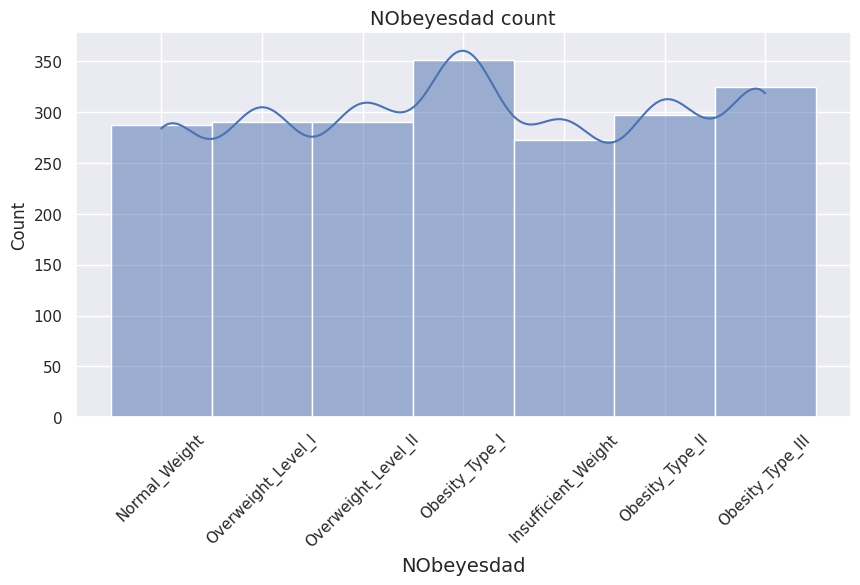

In [19]:
plt.figure(figsize=(10, 5))   
sns.histplot(x='NObeyesdad', data=ds_Obesity, kde=True)  
plt.title('NObeyesdad count', fontsize=14)
plt.xlabel('NObeyesdad', fontsize=14)
plt.xticks(rotation=45)
plt.show()

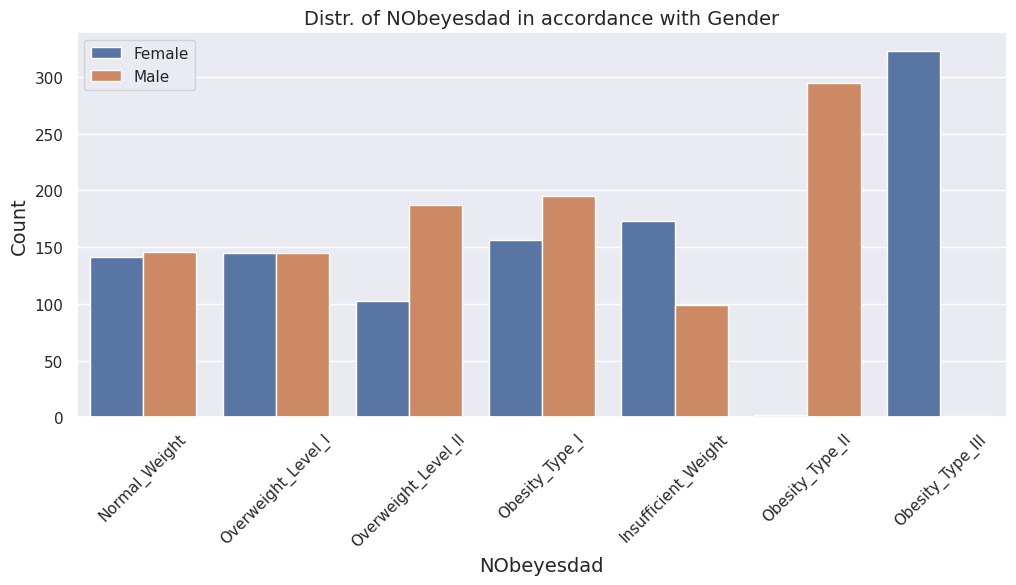

In [20]:
plt.figure(figsize=(12, 5))  
sns.countplot(x='NObeyesdad', data=ds_Obesity, hue='Gender')
plt.title('Distr. of NObeyesdad in accordance with Gender', fontsize=14)
plt.xlabel('NObeyesdad', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

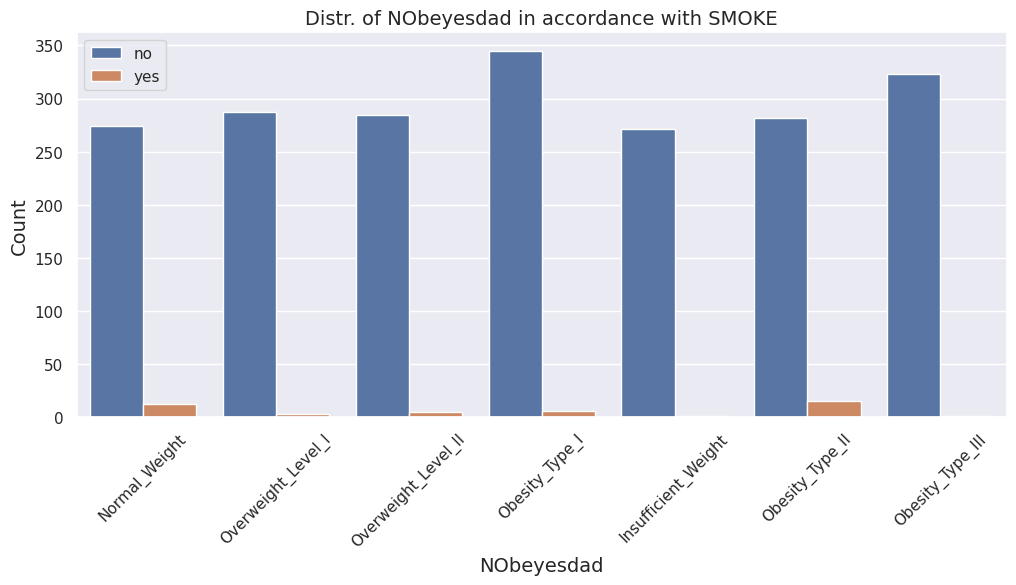

In [21]:
plt.figure(figsize=(12, 5))  
sns.countplot(x='NObeyesdad', data=ds_Obesity, hue='SMOKE')
plt.title('Distr. of NObeyesdad in accordance with SMOKE', fontsize=14)
plt.xlabel('NObeyesdad', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

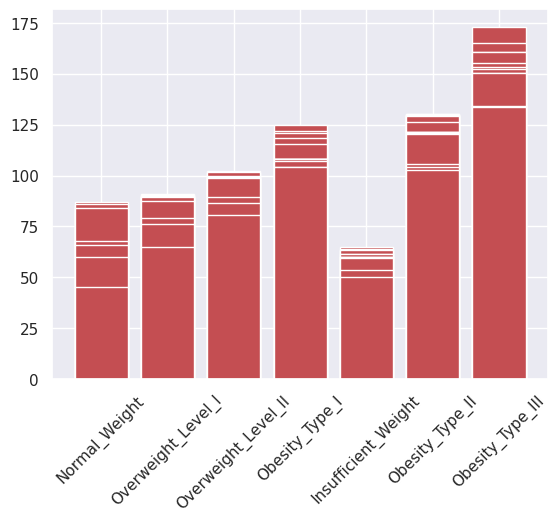

In [22]:
plt.bar(x='NObeyesdad', height='Weight', data=ds_Obesity , color= 'r')
plt.xticks(rotation=45)
plt.show()

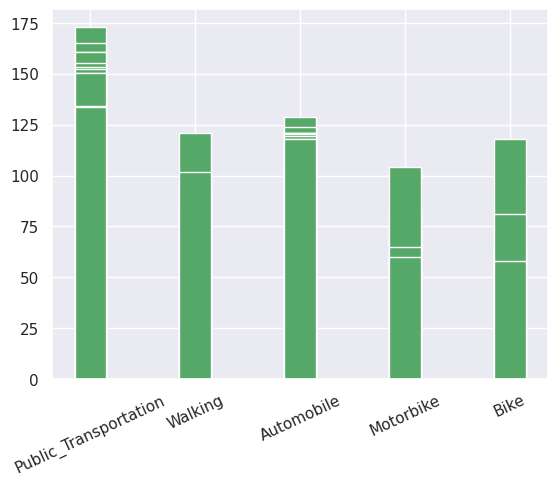

In [23]:
plt.bar(x='MTRANS', height='Weight', data=ds_Obesity , color= 'g', width = 0.3)
plt.xticks(rotation=25)
plt.show()

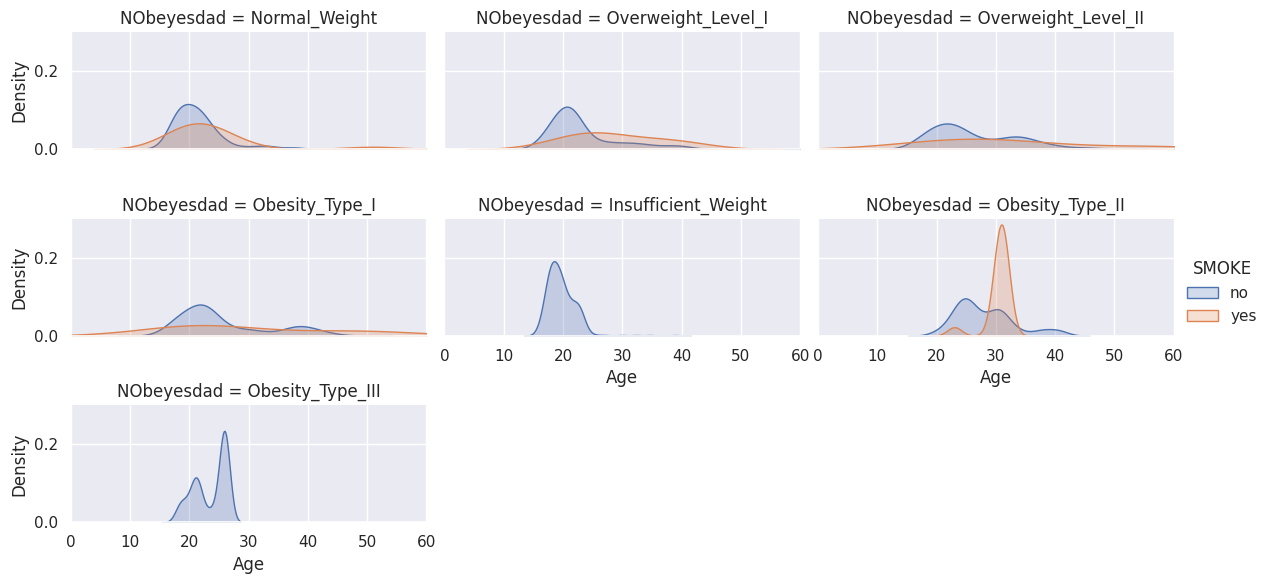

In [24]:
facet = sns.FacetGrid(ds_Obesity, hue='SMOKE',col="NObeyesdad",col_wrap=3, aspect=2, height=2)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, 60))
facet.add_legend()
plt.show() 

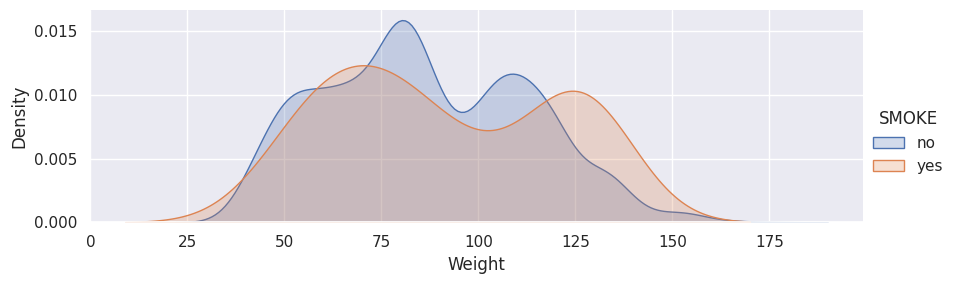

In [25]:
facet = sns.FacetGrid(ds_Obesity, hue="SMOKE",aspect=3)
facet.map(sns.kdeplot,'Weight',shade= True)
facet.add_legend()
plt.show() 

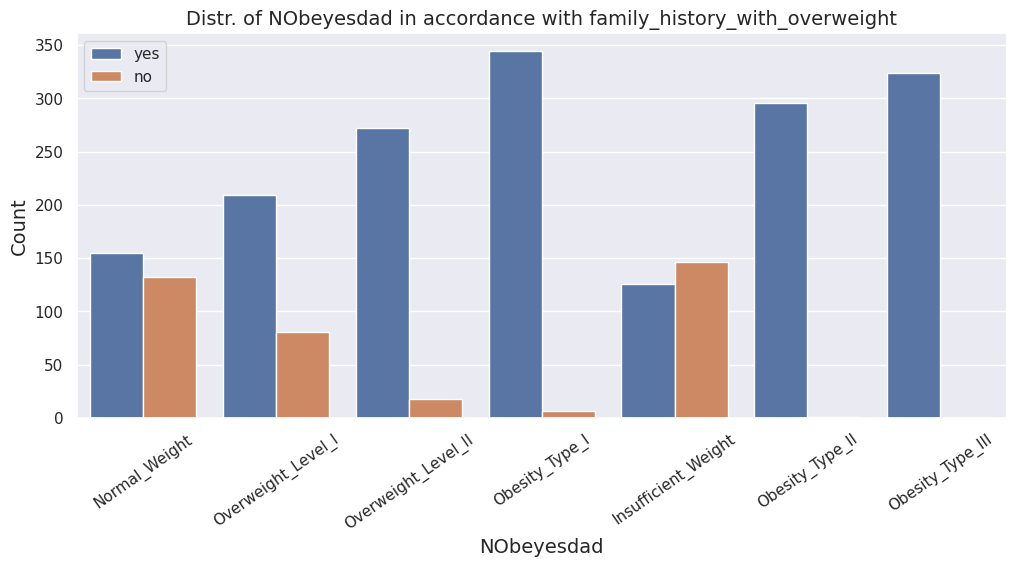

In [26]:
plt.figure(figsize=(12, 5))  
sns.countplot(x='NObeyesdad', data=ds_Obesity, hue='family_history_with_overweight')
plt.title('Distr. of NObeyesdad in accordance with family_history_with_overweight', fontsize=14)
plt.xlabel('NObeyesdad', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(loc='upper left')
plt.xticks(rotation=35)
plt.show()

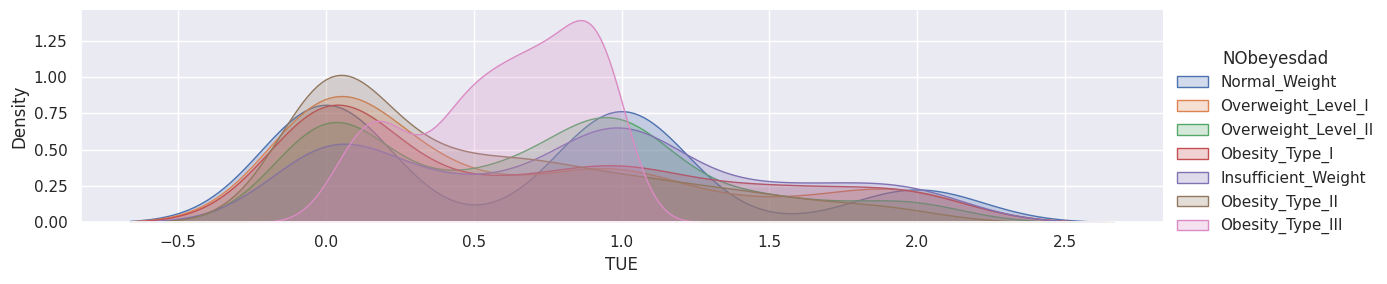

In [27]:
facet = sns.FacetGrid(ds_Obesity, hue='NObeyesdad', aspect=4, height=3)
facet.map(sns.kdeplot,'TUE',shade= True)
facet.add_legend()
plt.show() 

# Find null values

In [28]:
pd.DataFrame(ds_Obesity.isnull().sum())

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


### There are no nulls in the data

# Find Outliers

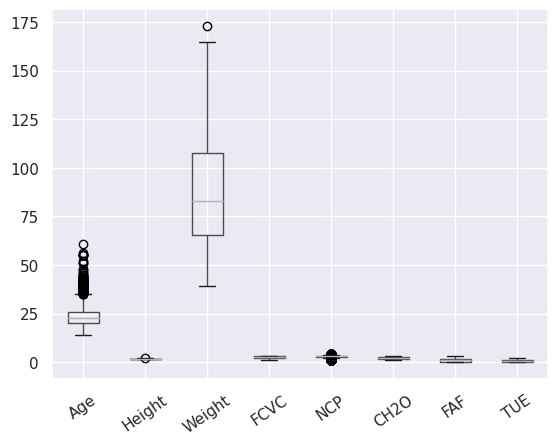

In [29]:
ds_Obesity.boxplot()
plt.xticks(rotation=35)
plt.show()

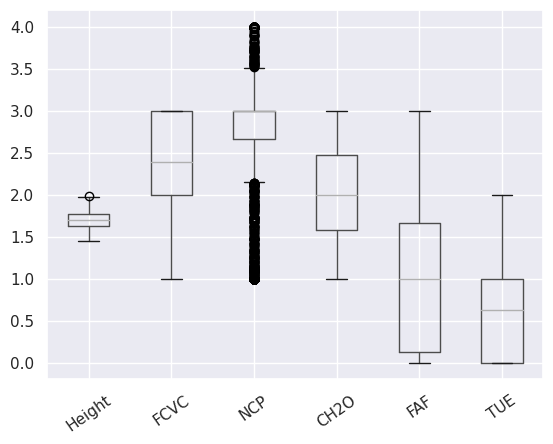

In [30]:
ds_Obesity.boxplot(['Height','FCVC','NCP','CH2O','FAF','TUE'])
plt.xticks(rotation=35)
plt.show()

### 'Age','NCP' columns have outliers

# Feature Engineering

# Dealing with category data

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ds_Obesity.Gender = le.fit_transform(ds_Obesity.Gender)
ds_Obesity.CALC = le.fit_transform(ds_Obesity.CALC)
ds_Obesity.FAVC = le.fit_transform(ds_Obesity.FAVC)
ds_Obesity.SCC= le.fit_transform(ds_Obesity.SCC)
ds_Obesity.SMOKE = le.fit_transform(ds_Obesity.SMOKE)
ds_Obesity.family_history_with_overweight = le.fit_transform(ds_Obesity.family_history_with_overweight)
ds_Obesity.CAEC = le.fit_transform(ds_Obesity.CAEC)
ds_Obesity.MTRANS = le.fit_transform(ds_Obesity.MTRANS)
ds_Obesity.NObeyesdad = le.fit_transform(ds_Obesity.NObeyesdad)

In [32]:
ds_Obesity.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,3,0,2.0,3.0,0,0,2.0,1,0.0,1.0,2,3,1
1,21.0,0,1.52,56.0,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,3,1
2,23.0,1,1.80,77.0,1,0,2.0,3.0,0,0,2.0,1,2.0,1.0,2,3,1
3,27.0,1,1.80,87.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,4,5
4,22.0,1,1.78,89.8,2,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,3,6


# Correlation between features and target
### use absolute to prevent confusion with negative values

In [33]:
abs(ds_Obesity.corr())

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
Age,1.000000,0.048394,0.025958,0.202560,0.044487,0.063902,0.016291,0.043944,0.116283,0.091987,0.045304,0.205725,0.144938,0.296931,0.083739,0.601945,0.236170
Gender,0.048394,1.000000,0.618466,0.161668,0.007616,0.064934,0.274505,0.067600,0.102633,0.044698,0.107930,0.102512,0.189607,0.017269,0.091543,0.137537,0.024908
Height,0.025958,0.618466,1.000000,0.463136,0.129732,0.178364,0.038121,0.243672,0.133753,0.055499,0.213376,0.247684,0.294709,0.051912,0.048818,0.073609,0.038986
Weight,0.202560,0.161668,0.463136,1.000000,0.206677,0.272300,0.216125,0.107469,0.201906,0.025746,0.200575,0.496820,0.051436,0.071561,0.287493,0.004610,0.387643
CALC,0.044487,0.007616,0.129732,0.206677,1.000000,0.089520,0.060781,0.071747,0.003463,0.082471,0.091386,0.036676,0.086799,0.045864,0.047540,0.012452,0.134632
FAVC,0.063902,0.064934,0.178364,0.272300,0.089520,1.000000,0.027283,0.007000,0.190658,0.050660,0.009719,0.208036,0.107995,0.068417,0.150068,0.069800,0.044582
FCVC,0.016291,0.274505,0.038121,0.216125,0.060781,0.027283,1.000000,0.042216,0.071852,0.014320,0.068461,0.040372,0.019939,0.101135,0.054670,0.064743,0.018522
NCP,0.043944,0.067600,0.243672,0.107469,0.071747,0.007000,0.042216,1.000000,0.015624,0.007811,0.057088,0.071370,0.129504,0.036326,0.097801,0.053858,0.092616
SCC,0.116283,0.102633,0.133753,0.201906,0.003463,0.190658,0.071852,0.015624,1.000000,0.047731,0.008036,0.185422,0.074221,0.010928,0.109179,0.043157,0.050679
SMOKE,0.091987,0.044698,0.055499,0.025746,0.082471,0.050660,0.014320,0.007811,0.047731,1.000000,0.031995,0.017385,0.011216,0.017613,0.055282,0.010702,0.023256


# Visualize correlation between features and target in a Heatmap 
### use absolute to prevent confusion with negative values

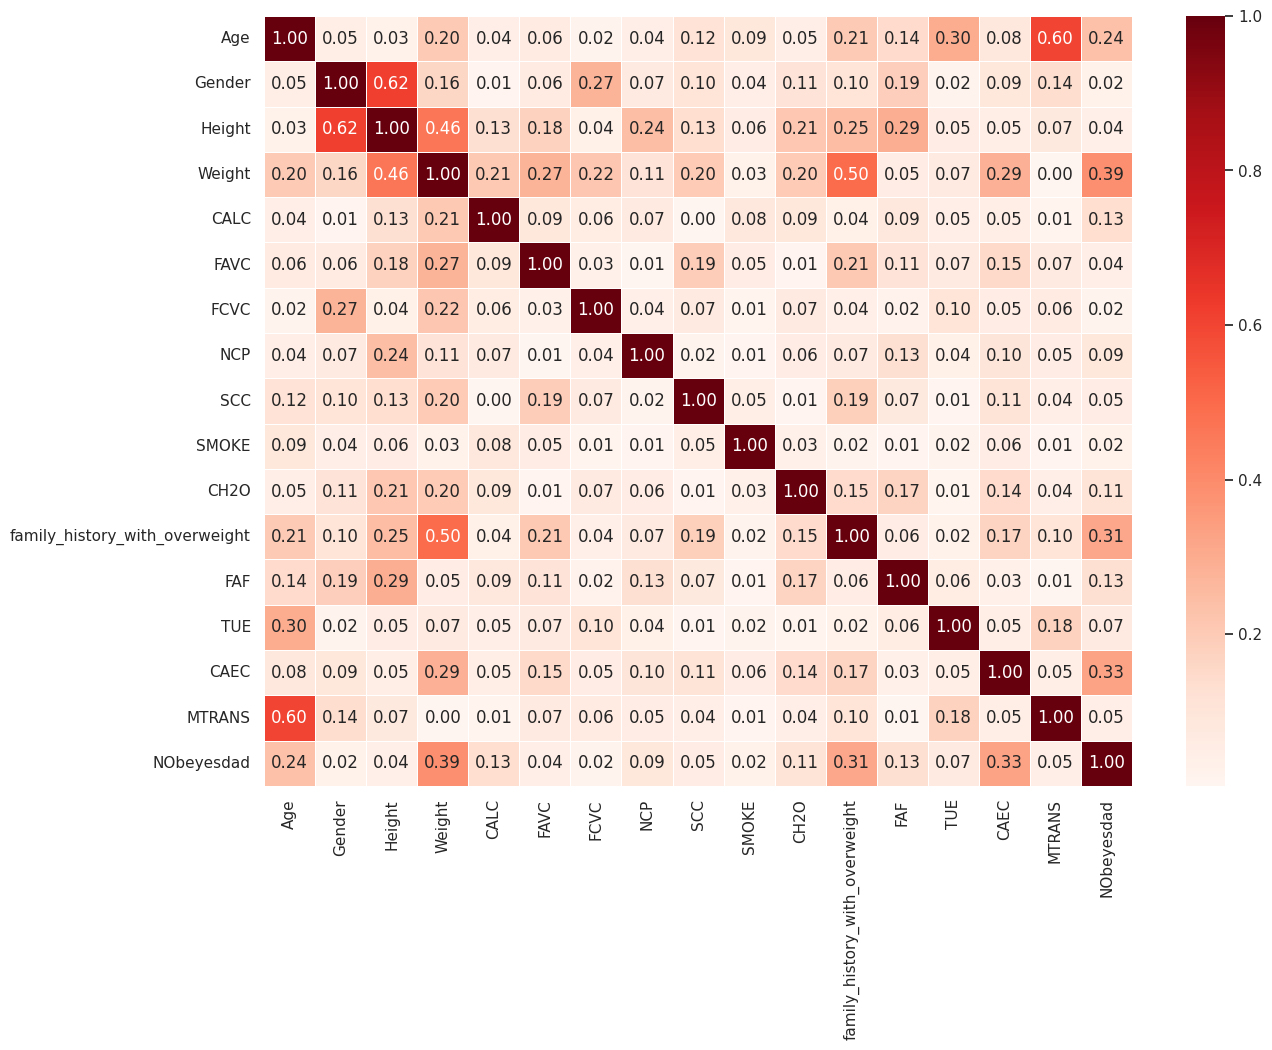

In [34]:
plt.figure(figsize=(14, 10)) 
sns.heatmap(abs(ds_Obesity.corr()), cbar=True,  annot=True, linewidth=0.5 ,fmt='.2f', cmap='Reds')
plt.show()

### The colors get darker as correlation increases

## Check multicollinearity between features considering the cutt value is 70%

In [35]:
abs(ds_Obesity.corr())>0.7

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
Age,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Gender,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Height,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Weight,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
CALC,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
FAVC,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
FCVC,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
NCP,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
SCC,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
SMOKE,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


####  There is no multicollinearity between features

## Visualize the check of multicollinearity between features considering the cutt value is 70%
### use absolute to prevent confusion with negative values

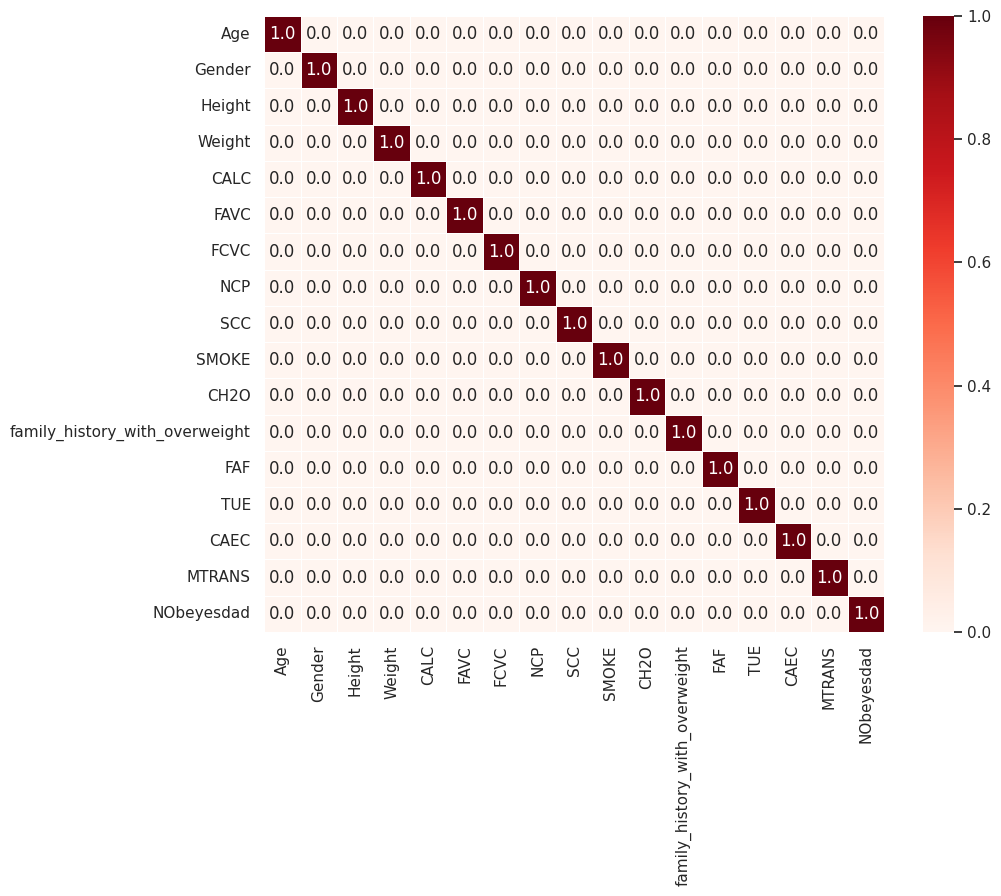

In [36]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(abs(ds_Obesity.corr())>0.7, cbar=True,  annot=True, linewidth=0.5 ,fmt='.1f', cmap='Reds')
plt.show()

#### - Values 1 refer to True (multicollinearity exist) - 0 refer to False (multicollinearity not exist)

# Correlation between the target and each feature
#### use absolute to prevent confusion with negative values

In [37]:
pd.DataFrame(abs(ds_Obesity.corr())['NObeyesdad'].sort_values(ascending=False))

,NObeyesdad
NObeyesdad,1.000000
Weight,0.387643
CAEC,0.327295
family_history_with_overweight,0.313667
Age,0.236170
CALC,0.134632
FAF,0.129564
CH2O,0.108868
NCP,0.092616
TUE,0.069448


#### 'Weight' 'CAEC' 'family_history_with_overweight' 'Age' 'CALC' 'FAF' 'CH2O' are high correlated features with target 'NObeyesdad'

# Split data into features and target

In [38]:
X = ds_Obesity.drop(['NObeyesdad'], inplace=False, axis=1)
X

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,21.000000,0,1.620000,64.000000,3,0,2.0,3.0,0,0,2.000000,1,0.000000,1.000000,2,3
1,21.000000,0,1.520000,56.000000,2,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,2,3
2,23.000000,1,1.800000,77.000000,1,0,2.0,3.0,0,0,2.000000,1,2.000000,1.000000,2,3
3,27.000000,1,1.800000,87.000000,1,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,2,4
4,22.000000,1,1.780000,89.800000,2,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0,1.710730,131.408528,2,1,3.0,3.0,0,0,1.728139,1,1.676269,0.906247,2,3
2107,21.982942,0,1.748584,133.742943,2,1,3.0,3.0,0,0,2.005130,1,1.341390,0.599270,2,3
2108,22.524036,0,1.752206,133.689352,2,1,3.0,3.0,0,0,2.054193,1,1.414209,0.646288,2,3
2109,24.361936,0,1.739450,133.346641,2,1,3.0,3.0,0,0,2.852339,1,1.139107,0.586035,2,3


In [39]:
y = ds_Obesity['NObeyesdad']
y

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: NObeyesdad, Length: 2111, dtype: int64

# Feature Selection

In [40]:
from sklearn.feature_selection import SelectKBest, chi2
FS = SelectKBest(chi2, k=12)
X_new = FS.fit_transform(X, y)

In [41]:
pd.DataFrame(X_new).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,21.0,0.0,64.0,0.0,2.0,3.0,0.0,0.0,1.0,0.0,2.0,3.0
1,21.0,0.0,56.0,0.0,3.0,3.0,1.0,1.0,1.0,3.0,2.0,3.0
2,23.0,1.0,77.0,0.0,2.0,3.0,0.0,0.0,1.0,2.0,2.0,3.0
3,27.0,1.0,87.0,0.0,3.0,3.0,0.0,0.0,0.0,2.0,2.0,4.0
4,22.0,1.0,89.8,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0


In [42]:
X.head(5)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,21.0,0,1.62,64.0,3,0,2.0,3.0,0,0,2.0,1,0.0,1.0,2,3
1,21.0,0,1.52,56.0,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,3
2,23.0,1,1.80,77.0,1,0,2.0,3.0,0,0,2.0,1,2.0,1.0,2,3
3,27.0,1,1.80,87.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,4
4,22.0,1,1.78,89.8,2,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,3


In [43]:
X = pd.DataFrame(X_new, columns= [i for i,j in zip(X.columns, FS.get_support()) if j])

In [44]:
X

,Age,Gender,Weight,FAVC,FCVC,NCP,SCC,SMOKE,family_history_with_overweight,FAF,CAEC,MTRANS
0,21.000000,0.0,64.000000,0.0,2.0,3.0,0.0,0.0,1.0,0.000000,2.0,3.0
1,21.000000,0.0,56.000000,0.0,3.0,3.0,1.0,1.0,1.0,3.000000,2.0,3.0
2,23.000000,1.0,77.000000,0.0,2.0,3.0,0.0,0.0,1.0,2.000000,2.0,3.0
3,27.000000,1.0,87.000000,0.0,3.0,3.0,0.0,0.0,0.0,2.000000,2.0,4.0
4,22.000000,1.0,89.800000,0.0,2.0,1.0,0.0,0.0,0.0,0.000000,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0.0,131.408528,1.0,3.0,3.0,0.0,0.0,1.0,1.676269,2.0,3.0
2107,21.982942,0.0,133.742943,1.0,3.0,3.0,0.0,0.0,1.0,1.341390,2.0,3.0
2108,22.524036,0.0,133.689352,1.0,3.0,3.0,0.0,0.0,1.0,1.414209,2.0,3.0
2109,24.361936,0.0,133.346641,1.0,3.0,3.0,0.0,0.0,1.0,1.139107,2.0,3.0


# Split data into train and test data

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, shuffle=True)

In [46]:
pd.DataFrame(X_train)

,Age,Gender,Weight,FAVC,FCVC,NCP,SCC,SMOKE,family_history_with_overweight,FAF,CAEC,MTRANS
1080,28.977792,0.0,78.000000,1.0,3.000000,3.000000,0.0,0.0,1.0,1.824340,2.0,0.0
1204,35.432059,0.0,80.135167,1.0,2.000000,3.000000,0.0,0.0,1.0,0.039207,2.0,0.0
1737,25.659092,1.0,117.631707,1.0,2.128574,3.000000,0.0,0.0,1.0,1.003294,2.0,3.0
1548,30.628650,1.0,118.363376,1.0,2.964319,3.000000,0.0,0.0,1.0,0.614959,2.0,0.0
2046,25.895546,0.0,110.074019,1.0,3.000000,3.000000,0.0,0.0,1.0,0.014370,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1638,32.290160,1.0,120.098812,1.0,2.967300,3.000000,0.0,0.0,1.0,0.955317,2.0,0.0
1095,23.000000,1.0,81.669950,1.0,2.000000,1.729553,0.0,0.0,1.0,0.887923,2.0,3.0
1130,22.989846,0.0,80.000000,1.0,2.000000,3.000000,0.0,0.0,1.0,0.146919,2.0,3.0
1294,23.000000,0.0,84.497980,1.0,2.058687,2.962004,0.0,0.0,1.0,0.851059,2.0,3.0


In [47]:
pd.DataFrame(y_train)

,NObeyesdad
1080,6
1204,6
1737,3
1548,3
2046,4
...,...
1638,3
1095,6
1130,6
1294,2


In [48]:
pd.DataFrame(X_test)

,Age,Gender,Weight,FAVC,FCVC,NCP,SCC,SMOKE,family_history_with_overweight,FAF,CAEC,MTRANS
544,20.406871,0.0,53.699561,1.0,2.000000,3.891994,0.0,0.0,1.0,2.870127,1.0,3.0
1987,26.000000,0.0,111.004920,1.0,3.000000,3.000000,0.0,0.0,1.0,0.000000,2.0,3.0
420,18.000000,1.0,60.000000,1.0,3.000000,4.000000,1.0,0.0,1.0,2.000000,2.0,0.0
527,21.000000,0.0,42.000000,1.0,3.000000,1.000000,0.0,0.0,0.0,0.000000,1.0,3.0
196,22.000000,1.0,74.000000,0.0,2.000000,3.000000,0.0,0.0,1.0,1.000000,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
331,17.000000,1.0,56.000000,1.0,2.000000,3.000000,0.0,0.0,1.0,2.000000,2.0,3.0
194,23.000000,0.0,83.000000,1.0,3.000000,3.000000,0.0,0.0,1.0,3.000000,1.0,3.0
322,23.000000,0.0,56.000000,0.0,3.000000,3.000000,0.0,0.0,0.0,2.000000,1.0,3.0
266,39.000000,0.0,50.000000,1.0,3.000000,4.000000,0.0,0.0,0.0,0.000000,1.0,3.0


In [49]:
pd.DataFrame(y_test)

,NObeyesdad
544,0
1987,4
420,0
527,0
196,1
...,...
331,1
194,2
322,0
266,0


# Classification machine learning models

# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
logregclassifier = LogisticRegression(random_state = 42)
logregclassifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

## Model prediction

In [51]:
y_predict_logr = logregclassifier.predict(X_test)
pd.DataFrame(y_predict_logr, columns = ['NObeyesdad'])

,NObeyesdad
0,0
1,4
2,0
3,1
4,6
...,...
523,0
524,1
525,1
526,1


In [52]:
print('LogisticRegressionModel Classes are : ' , logregclassifier.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , logregclassifier.n_iter_)

LogisticRegressionModel Classes are :  [0 1 2 3 4 5 6]
LogisticRegressionModel No. of iteratios is :  [100]


## Evaluate the model

In [53]:
print("score_test=", logregclassifier.score(X_test , y_test)*100)
print("score_train=", logregclassifier.score(X_train , y_train)*100)
cm = confusion_matrix(y_test, y_predict_logr)
print(cm)
AccScore = accuracy_score(y_test, y_predict_logr, normalize=False)
print('Accuracy Score is : ', AccScore)
ZeroOneLossValue = zero_one_loss(y_test,y_predict_logr,normalize=False) 
print('Zero One Loss Value : ', ZeroOneLossValue )
F1Score = f1_score(y_test, y_predict_logr, average='micro') 
print('F1 Score is : ', F1Score*100)
RecallScore = recall_score(y_test, y_predict_logr, average='weighted') 
print('Recall Score is : ', RecallScore*100)
PrecisionScore = precision_score(y_test, y_predict_logr, average='micro')
print('Precision Score is : ', PrecisionScore*100)
ClassificationReport = classification_report(y_test, y_predict_logr)
print('Classification Report is : ', ClassificationReport )

score_test= 58.90151515151515
score_train= 62.223626026531896
[[47 15  0  0  0  6  0]
 [19 29  4  0  1 17  8]
 [ 0  1 38 27 12  3 13]
 [ 0  0  3 61  2  0  9]
 [ 0  0  0  0 79  0  0]
 [ 3  7  7  2  1 36 15]
 [ 0  7 10  7  2 16 21]]
Accuracy Score is :  311
Zero One Loss Value :  217
F1 Score is :  58.90151515151515
Recall Score is :  58.90151515151515
Precision Score is :  58.90151515151515
Classification Report is :                precision    recall  f1-score   support

           0       0.68      0.69      0.69        68
           1       0.49      0.37      0.42        78
           2       0.61      0.40      0.49        94
           3       0.63      0.81      0.71        75
           4       0.81      1.00      0.90        79
           5       0.46      0.51      0.48        71
           6       0.32      0.33      0.33        63

    accuracy                           0.59       528
   macro avg       0.57      0.59      0.57       528
weighted avg       0.58      0.59    

In [54]:
print("\n".join("{}         {}".format(x, y) for x, y in zip(y_test[:10], y_predict_logr[:10])))

0         0
4         4
0         0
0         1
1         6
0         0
3         3
5         5
2         2
0         1


## Accuracy of the model is not accepted

# Decision Tree Classification

In [55]:
from sklearn.tree import DecisionTreeClassifier
dectreeclassifier = DecisionTreeClassifier(criterion = 'gini', random_state = 125 ,max_depth=6)
dectreeclassifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=125)

## Model prediction

In [56]:
y_predict_dtc = dectreeclassifier.predict(X_test)
pd.DataFrame(y_predict_dtc, columns = ['NObeyesdad'])

,NObeyesdad
0,0
1,4
2,0
3,0
4,1
...,...
523,1
524,2
525,1
526,1


## Evaluate the model

In [57]:
print("score_test=", dectreeclassifier.score(X_test , y_test)*100)
print("score_train=", dectreeclassifier.score(X_train , y_train)*100)
cm = confusion_matrix(y_test, y_predict_dtc)
print(cm)
AccScore = accuracy_score(y_test, y_predict_dtc, normalize=False)
print('Accuracy Score is : ', AccScore)
ZeroOneLossValue = zero_one_loss(y_test,y_predict_dtc,normalize=False) 
print('Zero One Loss Value : ', ZeroOneLossValue )
F1Score = f1_score(y_test, y_predict_dtc, average='micro') 
print('F1 Score is : ', F1Score*100)
RecallScore = recall_score(y_test, y_predict_dtc, average='weighted') 
print('Recall Score is : ', RecallScore*100)
PrecisionScore = precision_score(y_test, y_predict_dtc, average='micro')
print('Precision Score is : ', PrecisionScore*100)
ClassificationReport = classification_report(y_test, y_predict_dtc)
print('Classification Report is : ', ClassificationReport )

score_test= 81.81818181818183
score_train= 85.5969677826911
[[57  9  0  0  0  2  0]
 [ 8 51  0  0  0 13  6]
 [ 0  1 79  7  0  1  6]
 [ 0  0  2 72  0  0  1]
 [ 0  0  1  0 78  0  0]
 [ 0  5  0  0  0 49 17]
 [ 0  1 14  1  0  1 46]]
Accuracy Score is :  432
Zero One Loss Value :  96
F1 Score is :  81.81818181818183
Recall Score is :  81.81818181818183
Precision Score is :  81.81818181818183
Classification Report is :                precision    recall  f1-score   support

           0       0.88      0.84      0.86        68
           1       0.76      0.65      0.70        78
           2       0.82      0.84      0.83        94
           3       0.90      0.96      0.93        75
           4       1.00      0.99      0.99        79
           5       0.74      0.69      0.72        71
           6       0.61      0.73      0.66        63

    accuracy                           0.82       528
   macro avg       0.82      0.81      0.81       528
weighted avg       0.82      0.82      0

In [58]:
print("\n".join("{}         {}".format(x, y) for x, y in zip(y_test[:20], y_predict_dtc[:20])))

0         0
4         4
0         0
0         0
1         1
0         0
3         3
5         5
2         2
0         1
2         6
4         4
3         6
3         3
4         4
6         2
4         4
3         3
2         2
6         6


## Accuracy of the model is accepted

# Random Forest Classification

In [59]:
from sklearn.ensemble import RandomForestClassifier
ranforclassifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 42 ,max_depth=8,  min_samples_split=30)
ranforclassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=30,
                       n_estimators=200, random_state=42)

## Model prediction

In [60]:
y_predict_rfc = ranforclassifier.predict(X_test)
pd.DataFrame(y_predict_rfc, columns = ['NObeyesdad'])

,NObeyesdad
0,0
1,4
2,0
3,0
4,1
...,...
523,0
524,1
525,1
526,0


## Evaluate the model

In [61]:
print("score_test=", ranforclassifier.score(X_test , y_test)*100)
print("score_train=", ranforclassifier.score(X_train , y_train)*100)
cm = confusion_matrix(y_test, y_predict_rfc)
print(cm)
AccScore = accuracy_score(y_test, y_predict_rfc, normalize=False)
print('Accuracy Score is : ', AccScore)
ZeroOneLossValue = zero_one_loss(y_test,y_predict_rfc,normalize=False) 
print('Zero One Loss Value : ', ZeroOneLossValue )
F1Score = f1_score(y_test, y_predict_rfc, average='micro') 
print('F1 Score is : ', F1Score*100)
RecallScore = recall_score(y_test, y_predict_rfc, average='weighted') 
print('Recall Score is : ', RecallScore*100)
PrecisionScore = precision_score(y_test, y_predict_rfc, average='micro')
print('Precision Score is : ', PrecisionScore*100)
ClassificationReport = classification_report(y_test, y_predict_rfc)
print('Classification Report is : ', ClassificationReport )

score_test= 87.31060606060606
score_train= 91.85091598231206
[[65  3  0  0  0  0  0]
 [ 8 62  0  0  0  6  2]
 [ 0  2 83  6  0  1  2]
 [ 0  0  3 72  0  0  0]
 [ 0  0  1  0 78  0  0]
 [ 0 13  0  0  0 54  4]
 [ 0  1 10  2  0  3 47]]
Accuracy Score is :  461
Zero One Loss Value :  67
F1 Score is :  87.31060606060606
Recall Score is :  87.31060606060606
Precision Score is :  87.31060606060606
Classification Report is :                precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.77      0.79      0.78        78
           2       0.86      0.88      0.87        94
           3       0.90      0.96      0.93        75
           4       1.00      0.99      0.99        79
           5       0.84      0.76      0.80        71
           6       0.85      0.75      0.80        63

    accuracy                           0.87       528
   macro avg       0.87      0.87      0.87       528
weighted avg       0.87      0.87      

In [62]:
print("\n".join("{}         {}".format(x, y) for x, y in zip(y_test[:20], y_predict_rfc[:20])))

0         0
4         4
0         0
0         0
1         1
0         0
3         3
5         5
2         2
0         0
2         2
4         4
3         3
3         3
4         4
6         2
4         4
3         3
2         2
6         6


## Accuracy of the model is accepted

In [63]:
from sklearn.naive_bayes import GaussianNB
gauNBclassifier = GaussianNB()
gauNBclassifier.fit(X_train, y_train)

GaussianNB()

## Model prediction

In [64]:
y_predict_nb = gauNBclassifier.predict(X_test)
pd.DataFrame(y_predict_nb, columns = ['NObeyesdad'])

,NObeyesdad
0,0
1,4
2,5
3,0
4,6
...,...
523,0
524,5
525,0
526,1


## Evaluate the model

In [65]:
print("score_test=", gauNBclassifier.score(X_test , y_test)*100)
print("score_train=", gauNBclassifier.score(X_train , y_train)*100)
cm = confusion_matrix(y_test, y_predict_nb)
print(cm)
AccScore = accuracy_score(y_test, y_predict_nb, normalize=False)
print('Accuracy Score is : ', AccScore)
ZeroOneLossValue = zero_one_loss(y_test,y_predict_nb,normalize=False) 
print('Zero One Loss Value : ', ZeroOneLossValue )
F1Score = f1_score(y_test, y_predict_nb, average='micro') 
print('F1 Score is : ', F1Score*100)
RecallScore = recall_score(y_test, y_predict_nb, average='weighted') 
print('Recall Score is : ', RecallScore*100)
PrecisionScore = precision_score(y_test, y_predict_nb, average='micro')
print('Precision Score is : ', PrecisionScore*100)
ClassificationReport = classification_report(y_test, y_predict_nb)
print('Classification Report is : ', ClassificationReport )

score_test= 63.4469696969697
score_train= 61.84459886291851
[[60  2  5  0  0  1  0]
 [27 25  5  0  1 14  6]
 [ 0  1 58 26  0  6  3]
 [ 0  0  3 71  0  0  1]
 [ 0  0  1  0 78  0  0]
 [ 2 10 34  0  0 22  3]
 [ 0  2 35  2  0  3 21]]
Accuracy Score is :  335
Zero One Loss Value :  193
F1 Score is :  63.4469696969697
Recall Score is :  63.4469696969697
Precision Score is :  63.4469696969697
Classification Report is :                precision    recall  f1-score   support

           0       0.67      0.88      0.76        68
           1       0.62      0.32      0.42        78
           2       0.41      0.62      0.49        94
           3       0.72      0.95      0.82        75
           4       0.99      0.99      0.99        79
           5       0.48      0.31      0.38        71
           6       0.62      0.33      0.43        63

    accuracy                           0.63       528
   macro avg       0.64      0.63      0.61       528
weighted avg       0.64      0.63      0.6

## Accuracy of the model is not accepted

# Support Vector Machine (SVM)

In [66]:
from sklearn.svm import SVC
svclassifier = SVC(kernel = 'linear', C=4, random_state = 42)
svclassifier.fit(X_train, y_train)

SVC(C=4, kernel='linear', random_state=42)

## Model prediction

In [67]:
y_predict_svm = svclassifier.predict(X_test)
pd.DataFrame(y_predict_svm, columns = ['NObeyesdad'])

,NObeyesdad
0,0
1,4
2,0
3,0
4,6
...,...
523,0
524,5
525,1
526,1


## Evaluate the model

In [68]:
print("score_test=", svclassifier.score(X_test , y_test)*100)
print("score_train=", svclassifier.score(X_train , y_train)*100)
cm = confusion_matrix(y_test, y_predict_svm)
print(cm)
AccScore = accuracy_score(y_test, y_predict_svm, normalize=False)
print('Accuracy Score is : ', AccScore)
ZeroOneLossValue = zero_one_loss(y_test,y_predict_svm,normalize=False) 
print('Zero One Loss Value : ', ZeroOneLossValue )
F1Score = f1_score(y_test, y_predict_svm, average='micro') 
print('F1 Score is : ', F1Score*100)
RecallScore = recall_score(y_test, y_predict_svm, average='weighted') 
print('Recall Score is : ', RecallScore*100)
PrecisionScore = precision_score(y_test, y_predict_svm, average='micro')
print('Precision Score is : ', PrecisionScore*100)
ClassificationReport = classification_report(y_test, y_predict_svm)
print('Classification Report is : ', ClassificationReport )

score_test= 81.25
score_train= 82.75426405559065
[[61  7  0  0  0  0  0]
 [17 48  0  0  0  9  4]
 [ 0  0 81  9  0  1  3]
 [ 0  0  7 68  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  3  2  0  0 55 11]
 [ 0  0 14  0  0 11 38]]
Accuracy Score is :  429
Zero One Loss Value :  99
F1 Score is :  81.25
Recall Score is :  81.25
Precision Score is :  81.25
Classification Report is :                precision    recall  f1-score   support

           0       0.78      0.90      0.84        68
           1       0.83      0.62      0.71        78
           2       0.78      0.86      0.82        94
           3       0.87      0.91      0.89        75
           4       1.00      0.99      0.99        79
           5       0.72      0.77      0.75        71
           6       0.68      0.60      0.64        63

    accuracy                           0.81       528
   macro avg       0.81      0.81      0.80       528
weighted avg       0.81      0.81      0.81       528



In [69]:
print("\n".join("{}         {}".format(x, y) for x, y in zip(y_test[:20], y_predict_svm[:20])))

0         0
4         4
0         0
0         0
1         6
0         0
3         3
5         5
2         2
0         0
2         2
4         4
3         2
3         3
4         4
6         5
4         4
3         3
2         2
6         6


## Accuracy of the model is accepted

# AdaBoost Classifier

In [70]:
from sklearn.ensemble import AdaBoostClassifier
ADBC = AdaBoostClassifier(n_estimators=500, learning_rate=0.2, algorithm='SAMME')
ADBC.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.2, n_estimators=500)

## Model prediction

In [71]:
y_predict_adbc = ADBC.predict(X_test)
pd.DataFrame(y_predict_adbc, columns = ['NObeyesdad'])

,NObeyesdad
0,0
1,4
2,1
3,0
4,1
...,...
523,0
524,6
525,0
526,0


## Evaluate the model

In [72]:
print("score_test=", ADBC.score(X_test , y_test)*100)
print("score_train=", ADBC.score(X_train , y_train)*100)
cm = confusion_matrix(y_test, y_predict_adbc)
print(cm)
AccScore = accuracy_score(y_test, y_predict_adbc, normalize=False)
print('Accuracy Score is : ', AccScore)
ZeroOneLossValue = zero_one_loss(y_test,y_predict_adbc,normalize=False) 
print('Zero One Loss Value : ', ZeroOneLossValue )
F1Score = f1_score(y_test, y_predict_adbc, average='micro') 
print('F1 Score is : ', F1Score*100)
RecallScore = recall_score(y_test, y_predict_adbc, average='weighted') 
print('Recall Score is : ', RecallScore*100)
PrecisionScore = precision_score(y_test, y_predict_adbc, average='micro')
print('Precision Score is : ', PrecisionScore*100)
ClassificationReport = classification_report(y_test, y_predict_adbc)
print('Classification Report is : ', ClassificationReport )

score_test= 49.43181818181818
score_train= 49.90524320909665
[[65  3  0  0  0  0  0]
 [32 39  0  0  0  0  7]
 [ 0  1 30  1 30  0 32]
 [ 0  0  1  3 71  0  0]
 [ 0  0  0  0 79  0  0]
 [ 3 42  0  0  0  0 26]
 [ 0 11  6  1  0  0 45]]
Accuracy Score is :  261
Zero One Loss Value :  267
F1 Score is :  49.43181818181818
Recall Score is :  49.43181818181818
Precision Score is :  49.43181818181818
Classification Report is :                precision    recall  f1-score   support

           0       0.65      0.96      0.77        68
           1       0.41      0.50      0.45        78
           2       0.81      0.32      0.46        94
           3       0.60      0.04      0.07        75
           4       0.44      1.00      0.61        79
           5       0.00      0.00      0.00        71
           6       0.41      0.71      0.52        63

    accuracy                           0.49       528
   macro avg       0.47      0.50      0.41       528
weighted avg       0.49      0.49     

## Accuracy of the model is not accepted

# Voting Classifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier

In [74]:
ranforclassifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 42 ,max_depth=10)
KNN = KNeighborsClassifier(n_neighbors=6)
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, random_state=42)
xgb = XGBClassifier(max_depth = 4 , learning_rate = 0.3 ,  n_estimators= 50, random_state=42 , max_features= 7 )

In [75]:
VotingClassifierModel = VotingClassifier([('RFC', ranforclassifier), ('KNN', KNN), ('GBC',gbc), ('XGB',xgb)])
VotingClassifierModel.fit(X, y)

VotingClassifier(estimators=[('RFC',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('KNN', KNeighborsClassifier(n_neighbors=6)),
                             ('GBC',
                              GradientBoostingClassifier(learning_rate=0.2,
                                                         n_estimators=200,
                                                         random_state=42)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            cols...
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.3, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_features=7, max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None, ...))])

## Model prediction

In [76]:
y_predict_vtc = VotingClassifierModel.predict(X_test)
pd.DataFrame(y_predict_vtc, columns = ['MSRP'])

,MSRP
0,0
1,4
2,0
3,0
4,1
...,...
523,1
524,2
525,0
526,0


## Evaluate the model

In [77]:
print("score_test=", VotingClassifierModel.score(X_test , y_test)*100)
print("score_train=", VotingClassifierModel.score(X_train , y_train)*100)
cm = confusion_matrix(y_test, y_predict_vtc)
print(cm)
AccScore = accuracy_score(y_test, y_predict_vtc, normalize=False)
print('Accuracy Score is : ', AccScore)
ZeroOneLossValue = zero_one_loss(y_test,y_predict_vtc,normalize=False) 
print('Zero One Loss Value : ', ZeroOneLossValue )
F1Score = f1_score(y_test, y_predict_vtc, average='micro') 
print('F1 Score is : ', F1Score*100)
RecallScore = recall_score(y_test, y_predict_vtc, average='weighted') 
print('Recall Score is : ', RecallScore*100)
PrecisionScore = precision_score(y_test, y_predict_vtc, average='micro')
print('Precision Score is : ', PrecisionScore*100)
ClassificationReport = classification_report(y_test, y_predict_vtc)
print('Classification Report is : ', ClassificationReport )

score_test= 99.43181818181817
score_train= 99.55780164245104
[[68  0  0  0  0  0  0]
 [ 0 78  0  0  0  0  0]
 [ 0  0 94  0  0  0  0]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  0 79  0  0]
 [ 0  1  0  0  0 70  0]
 [ 0  0  1  0  0  0 62]]
Accuracy Score is :  525
Zero One Loss Value :  3
F1 Score is :  99.43181818181817
Recall Score is :  99.43181818181817
Precision Score is :  99.43181818181817
Classification Report is :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       0.99      1.00      0.99        78
           2       0.98      1.00      0.99        94
           3       1.00      0.99      0.99        75
           4       1.00      1.00      1.00        79
           5       1.00      0.99      0.99        71
           6       1.00      0.98      0.99        63

    accuracy                           0.99       528
   macro avg       1.00      0.99      0.99       528
weighted avg       0.99      0.99      0

In [78]:
print("\n".join("{}         {}".format(x, y) for x, y in zip(y_test[:20], y_predict_vtc[:20])))

0         0
4         4
0         0
0         0
1         1
0         0
3         3
5         5
2         2
0         0
2         2
4         4
3         3
3         3
4         4
6         6
4         4
3         3
2         2
6         6


## Accuracy of the model is perfect